In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


### 透過 info() 觀察欄位屬性

In [4]:
app_train.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

### 透過 head() 觀察資料內容

In [5]:
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 透過 describe() 了解該欄位資料的描述統計結果

In [6]:
app_train[['AMT_INCOME_TOTAL']].describe()

,AMT_INCOME_TOTAL
count,3.075110e+05
mean,1.687979e+05
std,2.371231e+05
min,2.565000e+04
25%,1.125000e+05
50%,1.471500e+05
75%,2.025000e+05
max,1.170000e+08


### 透過箱型圖偵測異常資料
可發現在Y軸1.2的位置存在一異常大的資料
導致箱形圖呈現異常

{'whiskers': [<matplotlib.lines.Line2D at 0x1e410707ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e41070e438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e410707668>],
 'medians': [<matplotlib.lines.Line2D at 0x1e41070ec88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e41070ed68>],
 'means': []}

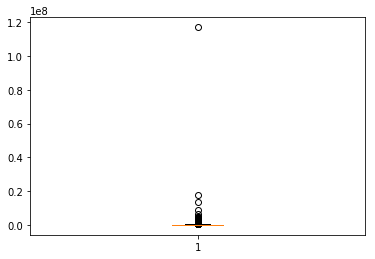

In [50]:
plt.boxplot(app_train['AMT_INCOME_TOTAL'], showfliers=True) 

### 透過 DF.hist() 繪製直方圖密度圖 了解資料分布情形
可發現直方圖密度圖呈現異常

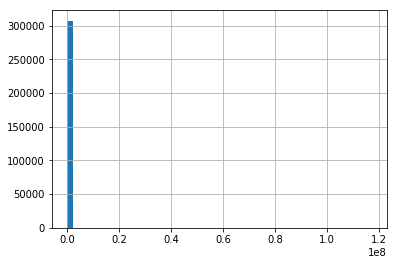

In [40]:
import matplotlib.pyplot as plt
app_train['AMT_INCOME_TOTAL'].hist(bins=50)

### 試著將異常值過濾掉在繪製一次圖形
### 透過 quantile(q=0~100%) 取得分位數數值

{'whiskers': [<matplotlib.lines.Line2D at 0x1e40fd80ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e40fd8a780>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e40fd809b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e40fd8afd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e40fd95438>],
 'means': []}

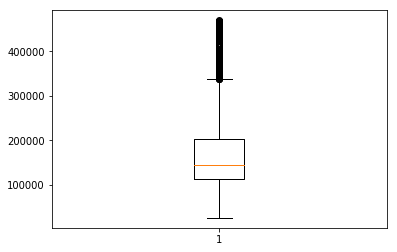

In [53]:
plt.boxplot(app_train[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(q=0.99)]['AMT_INCOME_TOTAL'], showfliers=True) 

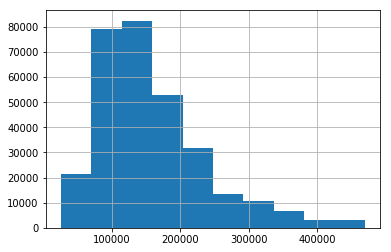

In [55]:
app_train[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(q=0.99)]['AMT_INCOME_TOTAL'].hist()

### 以下為繪製值方圖時 bins 參數使用方式
bins=10 將資料分成10筆 <br>
bins = [0,20,40,60,80,100] 將資料依據陣列級距分類

(array([ 10.,  31.,  92., 155., 238., 209., 151.,  84.,  21.,   9.]),
 array([-2.99203438, -2.38602302, -1.78001165, -1.17400028, -0.56798892,
         0.03802245,  0.64403382,  1.25004519,  1.85605655,  2.46206792,
         3.06807929]),
 <a list of 10 Patch objects>)

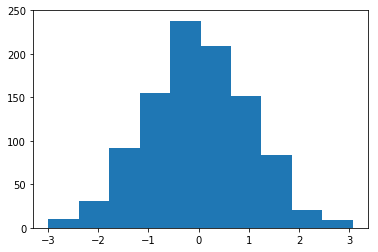

In [27]:
import numpy as np
import matplotlib.pyplot as plt
# bins=10 將資料分成10筆
x = np.random.randn(1000)
plt.hist(x, bins=10)

(array([  2.,   2.,   7.,  12.,  21.,  36.,  62.,  89., 118., 115., 116.,
        116., 112.,  66.,  50.,  29.,  23.,  11.,   7.,   6.]),
 array([-3.13277527, -2.82976238, -2.52674949, -2.22373659, -1.9207237 ,
        -1.61771081, -1.31469791, -1.01168502, -0.70867212, -0.40565923,
        -0.10264634,  0.20036656,  0.50337945,  0.80639234,  1.10940524,
         1.41241813,  1.71543103,  2.01844392,  2.32145681,  2.62446971,
         2.9274826 ]),
 <a list of 20 Patch objects>)

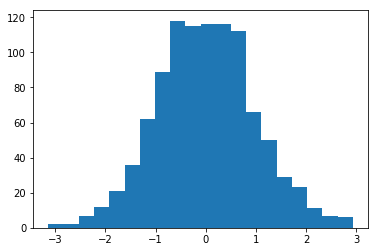

In [28]:
# bins=20 將資料分成20筆
x = np.random.randn(1000)
plt.hist(x, bins=20)

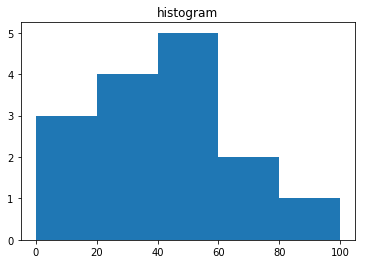

In [29]:
# bins = [0,20,40,60,80,100] 將資料依據陣列級距分類
from matplotlib import pyplot as plt 
import numpy as np  

a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]) 
plt.hist(a, bins =  [0,20,40,60,80,100]) 
plt.title("histogram") 
plt.show()